In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
df=pd.read_csv('master.csv')

In [5]:
df = df[df['transfer_movement'] == 'in']

In [15]:
#filter df_year for after 2013
df = df[df['year'] > 2013]

In [16]:
prem = df[df['club_name'].isin(['Chelsea FC', 'Manchester United', 'Manchester City', 'Liverpool FC', 'Norwich City', 'Huddersfield Town',
 'Arsenal FC', 'Tottenham Hotspur', 'Leicester City', 'West Ham United', 'Wolverhampton Wanderers', 
 'Aston Villa', 'Everton FC', 'Newcastle United', 'Leeds United', 'Southampton', 'Crystal Palace', 'Brighton & Hove Albion', 'Burnley FC', 
 'Fulham FC', 'West Bromwich Albion', 'Sheffield United', 'Nottingham Forest', 'Swansea City',  'West Bromwich Albion', 'Stoke City', 'Brentford FC', 'Watford FC', 'AFC Bournemouth', 'Cardiff City'])]

In [60]:
prem = prem.replace(to_replace=' FC', value='', regex=True)
prem = prem.replace(to_replace='Wolverhampton Wanderers', value='Wolves', regex=True)
prem = prem.replace(to_replace='Tottenham Hotspur', value='Tottenham', regex=True)
prem = prem.replace(to_replace='Brighton & Hove Albion', value='Brighton', regex=True)
prem = prem.replace(to_replace='Huddersfield Town', value='Huddersfield', regex=True)


In [61]:
prem = prem.groupby('club_name')['fee_cleaned'].sum().sort_values(ascending=False).reset_index()

In [62]:
prem

,club_name,fee_cleaned
0,Chelsea,1857.990
1,Manchester City,1553.230
2,Manchester United,1521.330
3,Arsenal,1098.040
4,Liverpool,1032.430
5,Tottenham,858.780
6,Everton,789.430
7,West Ham United,772.050
8,Newcastle United,751.180
9,Aston Villa,678.190


In [63]:
league_table = pd.read_csv('points.csv')

league_table

,Squad,Pts_2023,Pts_2022,Pts_2021,Pts_2019,Pts_2020,Total_Pts
0,Manchester City,79.0,93.0,86.0,100.0,98.0,456.0
1,Liverpool,59.0,92.0,69.0,75.0,97.0,392.0
2,Manchester Utd,63.0,58.0,74.0,81.0,66.0,342.0
3,Arsenal,78.0,69.0,61.0,63.0,70.0,341.0
4,Tottenham,54.0,71.0,62.0,77.0,71.0,335.0
5,Chelsea,39.0,74.0,67.0,70.0,72.0,322.0
6,West Ham,34.0,56.0,65.0,42.0,52.0,249.0
7,Newcastle Utd,65.0,49.0,45.0,44.0,45.0,248.0
8,Leicester City,30.0,52.0,66.0,47.0,52.0,247.0
9,Everton,29.0,39.0,59.0,49.0,54.0,230.0


In [64]:
league_table['Squad'] = league_table['Squad'].str.replace('Utd', 'United')
league_table = league_table.replace(to_replace=' FC', value='', regex=True)


In [65]:
total_fee = pd.merge(prem, league_table, left_on='club_name', right_on='Squad')

In [66]:
total_fee

,club_name,fee_cleaned,Squad,Pts_2023,Pts_2022,Pts_2021,Pts_2019,Pts_2020,Total_Pts
0,Chelsea,1857.990,Chelsea,39.0,74.0,67.0,70.0,72.0,322.0
1,Manchester City,1553.230,Manchester City,79.0,93.0,86.0,100.0,98.0,456.0
2,Manchester United,1521.330,Manchester United,63.0,58.0,74.0,81.0,66.0,342.0
3,Arsenal,1098.040,Arsenal,78.0,69.0,61.0,63.0,70.0,341.0
4,Liverpool,1032.430,Liverpool,59.0,92.0,69.0,75.0,97.0,392.0
5,Tottenham,858.780,Tottenham,54.0,71.0,62.0,77.0,71.0,335.0
6,Everton,789.430,Everton,29.0,39.0,59.0,49.0,54.0,230.0
7,Newcastle United,751.180,Newcastle United,65.0,49.0,45.0,44.0,45.0,248.0
8,Aston Villa,678.190,Aston Villa,54.0,45.0,55.0,NaN,NaN,154.0
9,Leicester City,642.605,Leicester City,30.0,52.0,66.0,47.0,52.0,247.0


`geom_smooth()` using formula = 'y ~ x'


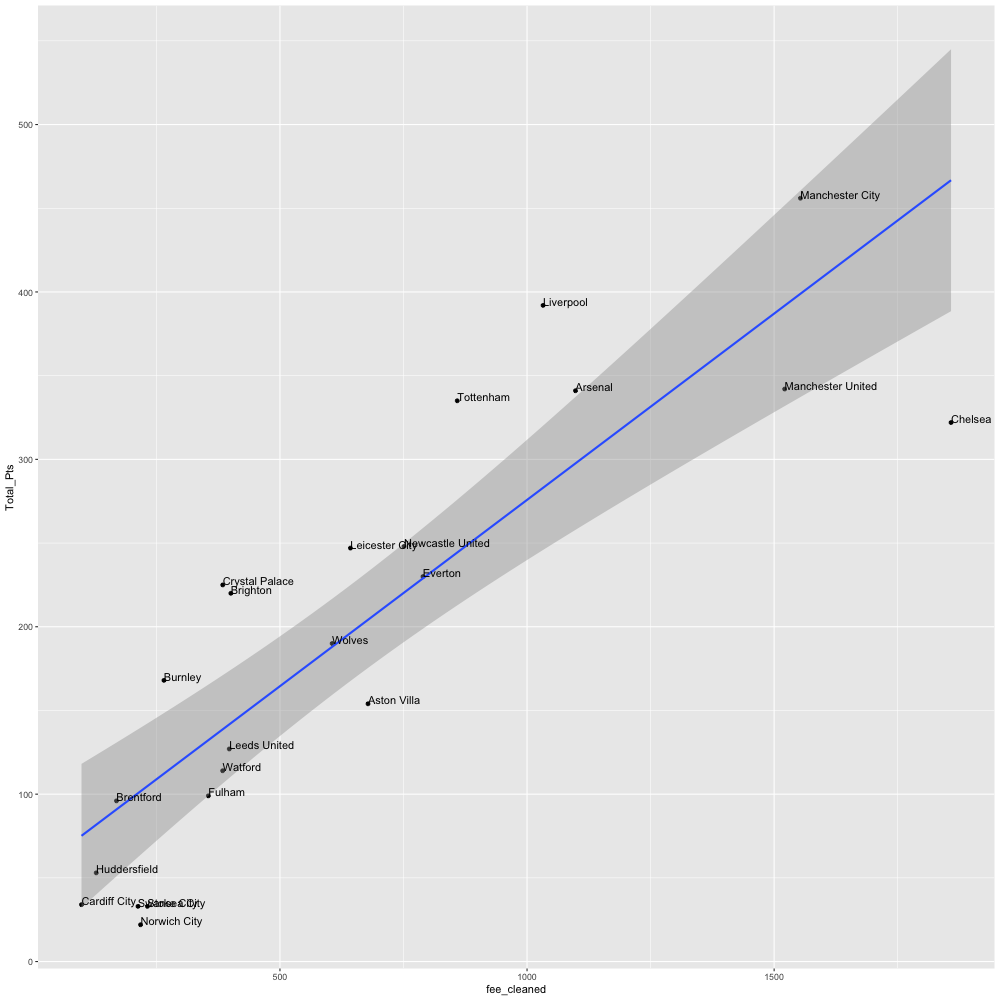

In [74]:
%%R -i total_fee -w 1000 -h 1000
#plot the data on gg plot, x axis as fee cleaned and y axis as table_pts
ggplot(total_fee, aes(x = fee_cleaned, y = Total_Pts)) +
  geom_point() +
  geom_smooth(method = 'lm') +
  geom_text(aes(label = club_name), hjust = 0, vjust = 0)

In [73]:
%%R -i total_fee

#regression analysis
model <- lm(fee_cleaned ~ Total_Pts, data=total_fee)

summary(model)


Call:
lm(formula = fee_cleaned ~ Pts_2023, data = total_fee)

Residuals:
    Min      1Q  Median      3Q     Max 
-646.10 -267.74  -59.36  137.23 1183.43 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  175.692    388.333   0.452    0.658
Pts_2023      12.791      7.389   1.731    0.105

Residual standard error: 455 on 14 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.1763,	Adjusted R-squared:  0.1175 
F-statistic: 2.997 on 1 and 14 DF,  p-value: 0.1054

